In [ ]:
#Allgemeine Imports
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Upload local training dataset
from google.colab import files

answer_var = input('Lokale Trainingsdaten hochladen? (j/n): ')
if answer_var == 'j':
  uploaded_train = files.upload()
  print('Hochladen der Trainingsdaten abgeschlossen.')
  training_filenames = uploaded_train.keys()                    #Dictionary of all uploaded file names

#Upload local testing dataset
elif answer_var == 'n':
  answer_var2 =input('Lokale Testdaten hochladen? (j/n): ')
  if answer_var2 == 'j':
    uploaded_test = files.upload()
    print('Hochladen der Testdaten abgeschlossen.')
    test_filenames = uploaded_test.keys()                    #Dictionary of all uploaded file names
#Fehler?
else:
  print('Falsche Eingabe!')


In [ ]:
import numpy
#Upload Imports
from numpy import genfromtxt
from numpy import loadtxt
from PIL import Image
from keras import layers
from google.colab import files

#Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


column_seperator = ','                                #';'
column_decimal = '.'                                  #','
first_it = True
first_it2 = True
x_train_labels = np.array([])
x_test_labels = np.array([])

#iterate through trainings filenames and add to nd array
training_filenameiterator = 0
for fn in uploaded_train.keys(): 
  #get filename
  str_filename = list(uploaded_train.keys())[training_filenameiterator]
  training_filenameiterator = training_filenameiterator + 1

  #load into x by y array
  train_file = np.array(genfromtxt(str_filename, delimiter=column_seperator,skip_header=1))
  #train_file = scaler.fit_transform(np.array(genfromtxt(str_filename, delimiter=column_seperator,skip_header=1)))

  #load into a x by y by z array
  train_file_3d = np.array([train_file])

  #concatenate Arrays
  if first_it == True:
    x_train = train_file_3d
    first_it = False
  else:
    x_train = np.concatenate((x_train,train_file_3d), axis = 0)
    
  #create array of x_train_labels (110 as 0 and 113 as 1)
  if str_filename[0:3] == '110':
    x_train_labels = numpy.append(x_train_labels,0)
  else:
    x_train_labels = numpy.append(x_train_labels,1)
  #x_train_labels = numpy.append(x_train_labels, str_filename[0:3])
 
#iterate through trainings filenames and add to nd array
test_filenameiterator = 0
for fn in uploaded_test.keys(): 
  #get filename
  str_filename = list(uploaded_test.keys())[test_filenameiterator]
  test_filenameiterator = test_filenameiterator + 1

  #load into x by y array
  test_file = np.array(genfromtxt(str_filename, delimiter=column_seperator,skip_header=1))
  #test_file = scaler.fit_transform(np.array(genfromtxt(str_filename, delimiter=column_seperator,skip_header=1)))

  #load into a x by y by z array
  test_file_3d = np.array([test_file])

  #concatenate Arrays
  if first_it2 == True:
    x_test = test_file_3d
    first_it2 = False
  else:
    x_test = np.concatenate((x_test,test_file_3d), axis = 0)
      
  #create array of x_test_labels (110 as 0 and 113 as 1)
  if str_filename[0:3] == '110':
    x_test_labels = numpy.append(x_test_labels,0)
  else:
    x_test_labels = numpy.append(x_test_labels,1)
  #x_test_labels = numpy.append(x_test_labels, str_filename[0:3])
print('Train Labels')
print(x_train_labels)
print('Test Labels')
print(x_test_labels)
class_names = ['110', '113']

Train Labels
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Labels
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


110_0_bit_output_fs_(301-400)_2.csv


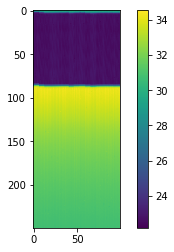

110_0_bit_output_fs_(301-400)_3.csv


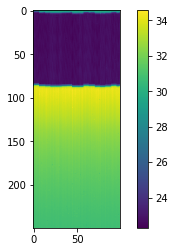

110_0_bit_output_fs_(301-400)_4.csv


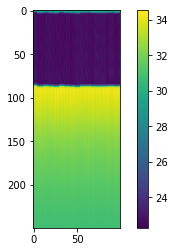

110_0_bit_output_fs_(301-400)_5.csv


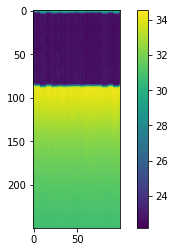

110_0_bit_output_fs_(401-500)_0.csv


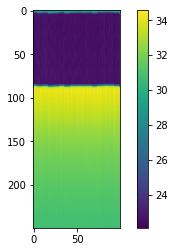

110_0_bit_output_fs_(401-500)_1.csv


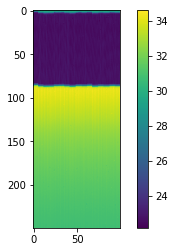

110_0_bit_output_fs_(401-500)_2.csv


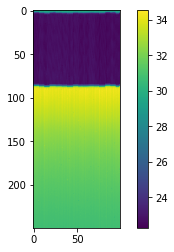

110_0_bit_output_fs_(401-500)_3.csv


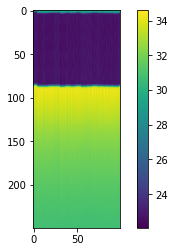

110_0_bit_output_fs_(401-500)_4.csv


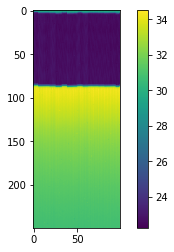

110_0_bit_output_fs_(401-500)_5.csv


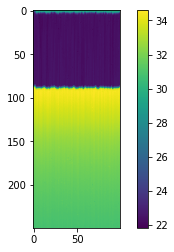

113_0_bit_output_fs_(301-500)_0.csv


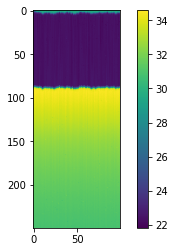

113_0_bit_output_fs_(301-500)_1.csv


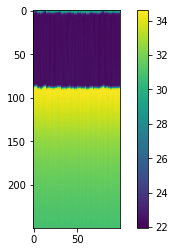

113_0_bit_output_fs_(301-500)_2.csv


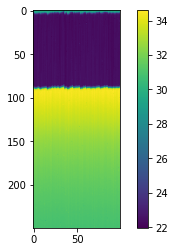

113_0_bit_output_fs_(301-500)_3.csv


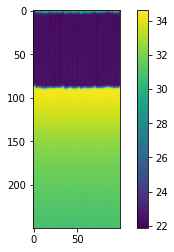

113_0_bit_output_fs_(301-500)_4.csv


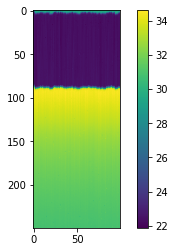

113_0_bit_output_fs_(301-500)_5.csv


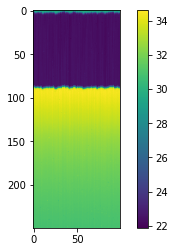

113_0_bit_output_fs_(301-500)_6.csv


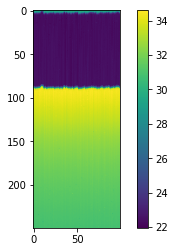

In [ ]:
#plot training data
plot_filenameiterator = 0
for fn in uploaded_test.keys():
  plt.figure()
  plt.imshow(x_train[plot_filenameiterator])
  plt.colorbar()
  print(fn)
  plt.grid(False)
  plt.show()
  plot_filenameiterator = plot_filenameiterator + 1


In [ ]:
#Options for Inputs
n_class = 2
n_input_height = 250
n_input_width = 100
n_sample = 18

#setup layers
print('x_train dtype: ')
print(x_train.dtype)

print('x_label dtype: ')
print(x_train_labels.dtype)

#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(250, 100)),
#    keras.layers.Dense(17, activation=tf.nn.relu), #128
#    keras.layers.Dense(17, activation=tf.nn.softmax) #2
#])

#inp = tf.keras.Input(shape=(n_input_height,n_input_width))
#x = tf.keras.layers.Dense(128, activation='relu')(inp)
#out = tf.keras.layers.Dense(n_class, activation='softmax')(x)
#model = keras.Sequential([inp, out])

model = keras.Sequential()
#Input Layer
model.add(tf.keras.layers.Conv2D(32,(5,5),activation = 'relu', input_shape=(n_input_height,n_input_width,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))

#Convolutional Layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

#Pooling Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))


#compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

#train model 
model.fit(x_train, x_train_labels, epochs=20)

In [ ]:
#Evaluate Accuracy
test_loss, test_acc = model.evaluate(x_test, x_test_labels)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 418ms/step - loss: nan - accuracy: 0.5882
Test accuracy: 0.5882353186607361


In [ ]:
#make predictions
predictions = model.predict(x_test)
#predictions[0]
print(predictions)